In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np

bias = []
for i in range(1,10):
    bias.append(fits.getdata("bias.0000000{}.fit".format(i) , ext=0).astype(np.int))

FileNotFoundError: [Errno 2] No such file or directory: 'bias.00000001.fit'

In [ ]:
bias[0].std()

In [ ]:
(bias[0] - bias[1]).std()

In [ ]:
avbias = sum(bias)/9

In [ ]:
avbias.std()

In [ ]:
half_sec = []
for i in range(1,10):
    half_sec.append(fits.getdata("half_sec.0000000{}.fit".format(i) , ext=0).astype(np.int))

In [ ]:
half_sub_bias = [half - avbias for half in half_sec]

In [ ]:
half_sub_bias[0].mean()

In [ ]:
half_sub_bias[0].std()

In [ ]:
print(half_sub_bias[1].mean())
print(half_sub_bias[1].std())

In [ ]:
halfav = sum(half_sub_bias)/9

In [ ]:
eight = []
for i in range(1,10):
    eight.append(fits.getdata("eight.0000000{}.fit".format(i) , ext=0).astype(np.int))

In [ ]:
eightbs = [ei - avbias for ei in eight]

In [ ]:
print(eightbs[0].mean())
print(eightbs[0].std())

In [42]:
plt.imshow(gainS, vmin = 0, vmax = 10, cmap ="viridis")

Gain 1.68
Read Noise 88.7350667203


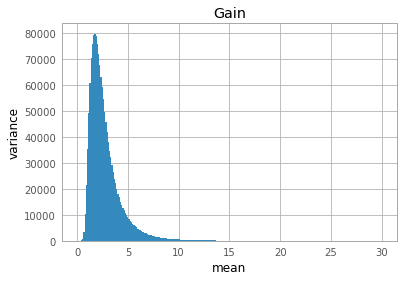

In [125]:
#This portion of the block is used to calculate the gain of our data. First, we create a histogram of all of our gain values
#for our "Sharknado" data. Afterwards, due to the central limit theorem and the assumption that the mean of 
#all of the gains of our data is the true value, this code works to calculate the most frequent value of our gain,
#which we assume is the true value of the gain. The true value is called 'gainmaxS'. 

gainS = meanS / varS


stdev_flatS = np.std(finalflatS)

n,b, Gains = plt.hist(gainS.flatten(),250 ,range = (0,30))
gainmax = np.where( n ==n.max())

gainmaxS=b[14]
print('Gain',b[14])
plt.xlabel('Gain')
plt.ylabel('Frequency')
plt.title('Gain Frequency')


#This portion of our code is used to calculate the read noise of the data. Since we had previously defined 
#Read noise as the mean of the variances of our data, this code calculates the variances of our Sharknado data
#And then calculates the mean, which will be our read noise. Since read noise is in ADU, we then multiply it 
#by our gain to get our read nosie in electrons. 

var_biasS=np.array(biasS).var()
N_ADU = np.array(var_biasS).mean()

#print(N_ADU)

RN=N_ADU*gainmaxS
print('Read Noise',RN)




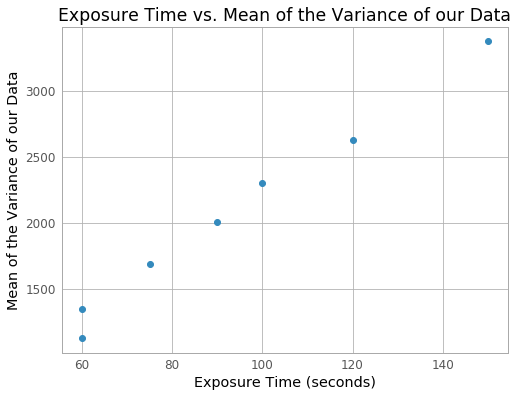

In [126]:
#This block of code creates a set of "mean versus variance" pairs as a function of exposure time for all of the groups. 



%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
from scipy import optimize

#Defining file paths for all of the functions to follow
file_pathS = "/Users/kaylank/Desktop/Lab4/ccd/Sharknado/"
file_path4 = "/Users/kaylank/Desktop/Lab4/ccd/Group4/"
file_path2 = "/Users/kaylank/Desktop/Lab4/ccd/Team2Awesome/"
file_pathM = "/Users/kaylank/Desktop/Lab4/ccd/Mattie/"
file_path5 = "/Users/kaylank/Desktop/Lab4/ccd/Team5/"
file_pathT = "/Users/kaylank/Desktop/Lab4/ccd/Trogo/"
file_path6 = "/Users/kaylank/Desktop/Lab4/ccd/TeamNot6/"

#This group of code stores all the bias data of all of the groups into respective arrays. 
biasS = []
for i in range(1,10):
    biasS.append(fits.getdata(file_pathS + "SBias0000000{}.fit".format(i), ext=0).astype(np.int))
biasS.append(fits.getdata(file_pathS + "SBias00000010.fit" , ext=0).astype(np.int))

bias4 = []
for i in range(1,10):
    bias4.append(fits.getdata(file_path4 + "bBias0000000{}.fit".format(i), ext=0).astype(np.int))
bias4.append(fits.getdata(file_path4 + "bBias00000010.fit" , ext=0).astype(np.int))

bias2 = []
for i in range(1,10):
    bias2.append(fits.getdata(file_path2 + "ABias0000000{}.fit".format(i), ext=0).astype(np.int))
bias2.append(fits.getdata(file_path2 + "ABias00000010.fit" , ext=0).astype(np.int))

biasM = []
for i in range(1,10):
    biasM.append(fits.getdata(file_pathM + "mBias0000000{}.fit".format(i), ext=0).astype(np.int))
biasM.append(fits.getdata(file_pathM + "mBias00000010.fit" , ext=0).astype(np.int))

bias5 = []
for i in range(1,10):
    bias5.append(fits.getdata(file_path5 + "kBias0000000{}.fit".format(i), ext=0).astype(np.int))
bias5.append(fits.getdata(file_path5 + "kBias00000010.fit" , ext=0).astype(np.int))

biasT = []
for i in range(1,10):
    biasT.append(fits.getdata(file_pathT + "TBias0000000{}.fit".format(i), ext=0).astype(np.int))
biasT.append(fits.getdata(file_pathT + "TBias00000010.fit" , ext=0).astype(np.int))

bias6 = []
for i in range(1,10):
    bias6.append(fits.getdata(file_path6 + "QBias0000000{}.fit".format(i), ext=0).astype(np.int))
bias6.append(fits.getdata(file_path6 + "QBias00000010.fit" , ext=0).astype(np.int))

#This group of code stores all the flat field data of all of the groups into respective arrays. 
flatfieldS = []
for i in range(11,21):
    flatfieldS.append(fits.getdata(file_pathS + "SFlatField000000{}.fit".format(i), ext=0).astype(np.int))

flatfield4 = []
for i in range(11,21):
    flatfield4.append(fits.getdata(file_path4 + "bFlatField000000{}.fit".format(i), ext=0).astype(np.int))

flatfield2 = []
for i in range(11,21):
    flatfield2.append(fits.getdata(file_path2 + "AFlatField000000{}.fit".format(i), ext=0).astype(np.int))

flatfieldM = []
for i in range(11,21):
    flatfieldM.append(fits.getdata(file_pathM + "mFlatField000000{}.fit".format(i), ext=0).astype(np.int))

flatfield5 = []
for i in range(11,21):
    flatfield5.append(fits.getdata(file_path5 + "kFlatField000000{}.fit".format(i), ext=0).astype(np.int))

flatfieldT = []
for i in range(11,21):
    flatfieldT.append(fits.getdata(file_pathT + "TFlatField000000{}.fit".format(i), ext=0).astype(np.int))
    
flatfield6 = []
for i in range(11,21):
    flatfield6.append(fits.getdata(file_path6 + "QFlatField000000{}.fit".format(i), ext=0).astype(np.int))



#This block of data calculates the average bias of each of the group's bias arrays
avgbiasS = np.asarray(biasS).mean(axis = 0)
avgbias4 = np.asarray(bias4).mean(axis = 0)
avgbias2 = np.asarray(bias2).mean(axis = 0)
avgbiasM = np.asarray(biasM).mean(axis = 0)
avgbias5 = np.asarray(bias5).mean(axis = 0)
avgbiasT = np.asarray(biasT).mean(axis = 0)
avgbias6 = np.asarray(bias6).mean(axis = 0)

#This block of data calculates our final flat data by correcting our flat field measurements by subtracting the
#average bias from all of the. 
finalflatS = [fieldS - avgbiasS for fieldS in flatfieldS]
finalflat4 = [field4 - avgbias4 for field4 in flatfield4]
finalflat2 = [field2 - avgbias2 for field2 in flatfield2]
finalflatM = [fieldM - avgbiasM for fieldM in flatfieldM]
finalflat5 = [field5 - avgbias5 for field5 in flatfield5]
finalflatT = [fieldT - avgbiasT for fieldT in flatfieldT]
finalflat6 = [field6 - avgbias6 for field6 in flatfield6]

#This group of data starts to compress our data into single values. It calculates one single mean signal value 
#for each of the group's data

varS = np.asarray(finalflatS).var(axis=0)
meanS = np.asarray(finalflatS).mean(axis =0)
meanSS = meanS.mean()

mean4 = np.asarray(finalflat4).mean(axis =0)

mean44=mean4.mean()
mean2 = np.asarray(finalflat2).mean(axis =0)

mean22=mean2.mean()
meanM = np.asarray(finalflatM).mean(axis =0)

meanMM=meanM.mean()
mean5 = np.asarray(finalflat5).mean(axis =0)

mean55=mean5.mean()
            
meanT = np.asarray(finalflatT).mean(axis =0)
meanTT=meanT.mean()
            
mean6 = np.asarray(finalflat6).mean(axis =0)
mean66=mean6.mean()

#This block of code plots the exposure time vs the mean signal value for each of the groups.

Texposure = [75, 150 , 90, 60 , 60 , 120, 100]
arr_meanflats = [meanSS, mean44, mean22, meanMM, mean55, meanTT, mean66]
plt.scatter(Texposure, arr_meanflats)
plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Mean Signal Value')
plt.title('Exposure Time vs. Mean Signal Value')




In [1]:
#This block of code creates a graph of CCD tempreture vs dark current. It follows a very similar protocol to the 
#block above.

%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit 


file_pathD = "/Users/kaylank/Desktop/Lab4/ccd/DarkCurrentData/"

#This block of code stores the dark current data for Sharknado's group into respective arrays which correspond to a different
#tempreture. 
Dark1 = []
for i in range(3,4):
    Dark1.append(fits.getdata(file_pathD + "SDark0000000{}.fit".format(i), ext=0).astype(np.int))

Dark2 = []
for i in range(7,8):
    Dark2.append(fits.getdata(file_pathD + "SDark0000000{}.fit".format(i), ext=0).astype(np.int))

Dark3 = []
for i in range(11,12):
    Dark3.append(fits.getdata(file_pathD + "SDark000000{}.fit".format(i), ext=0).astype(np.int))

Dark4 = []
for i in range(15,16):
    Dark4.append(fits.getdata(file_pathD + "SDark000000{}.fit".format(i), ext=0).astype(np.int))

Dark5 = []
for i in range(19,20):
    Dark5.append(fits.getdata(file_pathD + "SDark000000{}.fit".format(i), ext=0).astype(np.int))
###
#This block of code stores the Bias data for Sharknado's group into respective arrays which correspond to a different
#tempreture. 
Bias1 = []
for i in range(1,2):
    Bias1.append(fits.getdata(file_pathD + "SBias0000000{}.fit".format(i), ext=0).astype(np.int))

Bias2 = []
for i in range(5,6):
    Bias2.append(fits.getdata(file_pathD + "SBias0000000{}.fit".format(i), ext=0).astype(np.int))

Bias3 = []
for i in range(10,11):
    Bias3.append(fits.getdata(file_pathD + "SBias000000{}.fit".format(i), ext=0).astype(np.int))

Bias4 = []
for i in range(13,14):
    Bias4.append(fits.getdata(file_pathD + "SBias000000{}.fit".format(i), ext=0).astype(np.int))

Bias5 = []
for i in range(17,18):
    Bias5.append(fits.getdata(file_pathD + "SBias000000{}.fit".format(i), ext=0).astype(np.int))

#This block of code calculates the mean Bias for each respective array. 
meanBias1 = np.asarray(Bias1).mean(axis =0)
meanBias11 = meanBias1.mean()


meanBias2 = np.asarray(Bias2).mean(axis =0)
meanBias22=meanBias2.mean()


meanBias3= np.asarray(Bias3).mean(axis =0)
meanBias33=meanBias3.mean()


meanBias4 = np.asarray(Bias4).mean(axis =0)
meanBias44=meanBias4.mean()


meanBias5 = np.asarray(Bias5).mean(axis =0)
meanBias55=meanBias5.mean()

###

#This block of code calculates the mean Dark current value for each respective array. 
meanDark1 = np.asarray(Dark1).mean(axis =0)
meanDark11 = meanDark1.mean()


meanDark2 = np.asarray(Dark2).mean(axis =0)
meanDark22=meanDark2.mean()

meanDark3= np.asarray(Dark3).mean(axis =0)
meanDark33=meanDark3.mean()

meanDark4 = np.asarray(Dark4).mean(axis =0)
meanDark44=meanDark4.mean()

meanDark5 = np.asarray(Dark5).mean(axis =0)
meanDark55=meanDark5.mean()

#This block of code calculates the final variables that will be used by adjusting our dark current values with respect
#to our mean biases to achieve more accurate results, then converting our units from ADU to electrons
temp = [10,6,2,-2,-6]

T=np.array(temps)
final1= ((meanDark11- meanBias11)*gainmaxS)/70
final2= ((meanDark22- meanBias22)*gainmaxS)/70
final3= ((meanDark33- meanBias33)*gainmaxS)/70
final4= ((meanDark44- meanBias44)*gainmaxS)/70
final5= ((meanDark55- meanBias55)*gainmaxS)/70

#This block of code creates the fit for our dark current data
xvals= np.array(temps)
yvals = np.array(darks2)

k= 8.6173303*(10**(-5))

def func (x,a,E):
    darkcurrent= a*T**(3/2)*np.exp(-E/(2*k*T)) #Our dark current formula 
    return darkcurrent

coeffs, fiterr = curve_fit(func, xvals, yvals, p0=(at,Et), maxfev=1000)

print ("a=%s, E=%s" % (coeffs[0], coeffs[1])) #'a' corresponds to coeffs[0], which is our dark Current constant. #'E' corresponds to coeffs[1], which corresponds to our band gap energy
plt.plot(xvals,yvals, '+')
plt.plot(xvals,func(xvals,*coeffs),'r.')
plt.xlabel('CCD Tempreture (Kelvin)')
plt.ylabel('Dark Current')
plt.title('CCD Tempreture (Kelvin) vs. Dark Current')
plt.show()







FileNotFoundError: [Errno 2] No such file or directory: '/Users/kaylank/Desktop/Lab4/ccd/DarkCurrentData/SDark00000003.fit'